In [1]:
#import packages
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

#initiate data paths, using Path insures paths can be replicated on any OS
raw_data_fpath = Path("Data/raw")
clean_data_fpath = Path("Data/clean")

# Read in Raw Data

In [2]:
filename = 'accepted_2007_to_2018Q4'
accepted_loans = pd.read_csv(raw_data_fpath / (filename + '.csv'))
accepted_loans.head()

/Users/peterkromkowski/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


# Data Exploration

Performed initial data exploration to identify anomalies, patterns, or dirty data. Specifically, created a statistical  table that encapsulated basic information for each feature, such as frequency, mean, and percent missing. The information identified in this table gave a starting point for the cleaning process.

In [3]:
#Statistically describe each column
desc = accepted_loans.describe(include = 'all')
desc.loc['dtype'] = accepted_loans.dtypes # type of each features
desc.loc['% null'] = accepted_loans.isnull().mean() #percent missing for each feature
desc

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
count,2.2607e+06,0,2.26067e+06,2.26067e+06,2.26067e+06,2260668,2.26067e+06,2.26067e+06,2260668,2260668,...,10917,10917,2260668,2260668,34246,34246,34246,34246,34246,34246
unique,2.2607e+06,NaN,NaN,NaN,NaN,2,NaN,NaN,7,35,...,NaN,NaN,2,2,83,3,90,NaN,NaN,NaN
top,8.38861e+07,NaN,NaN,NaN,NaN,36 months,NaN,NaN,B,C1,...,NaN,NaN,Cash,N,Feb-2019,ACTIVE,Jan-2019,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,1609754,NaN,NaN,663557,145903,...,NaN,NaN,2182546,2226422,2606,14704,1710,NaN,NaN,NaN
mean,NaN,NaN,15046.9,15041.7,15023.4,NaN,13.0928,445.807,NaN,NaN,...,11636.9,193.994,NaN,NaN,NaN,NaN,NaN,5010.66,47.7804,13.1913
std,NaN,NaN,9190.25,9188.41,9192.33,NaN,4.83214,267.174,NaN,NaN,...,7625.99,198.629,NaN,NaN,NaN,NaN,NaN,3693.12,7.31182,8.15998
min,NaN,NaN,500,500,0,NaN,5.31,4.93,NaN,NaN,...,55.73,0.01,NaN,NaN,NaN,NaN,NaN,44.21,0.2,0
25%,NaN,NaN,8000,8000,8000,NaN,9.49,251.65,NaN,NaN,...,5627,44.44,NaN,NaN,NaN,NaN,NaN,2208,45,6
50%,NaN,NaN,12900,12875,12800,NaN,12.62,377.99,NaN,NaN,...,10028.4,133.16,NaN,NaN,NaN,NaN,NaN,4146.11,45,14
75%,NaN,NaN,20000,20000,20000,NaN,15.99,593.32,NaN,NaN,...,16151.9,284.19,NaN,NaN,NaN,NaN,NaN,6850.17,50,18


Raw data thoughts:
   - 'id' could be a great dataframe key as it is all unique values, currently not recognized as an int data type
   - 'member_id' is completely empty
   - Date columns are not formatted as dates
   - There are a significant amount of columns with missing data
   - 'dti' has a range of (-1, 999). This is very usual when compared to the normal range of DTI.
   - columns with texts (url, title) have a lot of unique values. If these are user inputted, the variations among users may be too much to extract anything worthwhile

## Clean

During cleaning, steps are taken to fix the irregularities without making any assuptions about what the clean data should be used for. In the future, clients goals, should be taken into account before deeming columns unnecessary and removing them. 

In [4]:
accpt_clean = accepted_loans.copy() #make new copy to access if mistakes are made during cleaning

Cleaning focused on formatting all of the features to the best possible representation of their data. 

   - The 'id' column contained some summary rows that had strings in them and stopped the whole column from being numeric. These rows of strings were removed and the column was converted to numeric.
   - 'term' and 'emp_length' are categorical features of time. Their values represent a specific amount of time. The numerics in these columns were extracted and the columns converted to numeric so later analysis could utilize the linear time dependencies between the different values in each. 
   - There were five date columns that were not recognized as such. They were succesfully converted to datetimes. 
     - It is an industry standard to report loan data on the first of the month, after converting the columns to datetime, a quick analysis of the 'day' digit for each date was performed to see if all dates were being reported on the same day of the month by Lending Club or if this data was directly from consumer raw data.

In [5]:
# Fix id
accpt_clean = accpt_clean[accpt_clean.id.apply(lambda x: str(x).isnumeric())].set_index('id')

# Convert Objects to Numeric
accpt_clean['term'] = accpt_clean['term'].str.extract('(\d+)').astype('float')
accpt_clean['emp_length'] = accpt_clean['emp_length'].replace({'< 1 year': '0 years', '10+ years': '10 years'})
accpt_clean['emp_length'] = accpt_clean['emp_length'].str.extract('(\d+)').astype('float')

# Format Date Columns
filter_col = [col for col in accpt_clean if col.endswith('_d')] + ['earliest_cr_line']
accpt_clean[filter_col] = accpt_clean[filter_col].apply(pd.to_datetime)

#Unique Day Values
accpt_clean[['issue_d', 'earliest_cr_line', 'last_pymnt_d','next_pymnt_d','last_credit_pull_d']] \
            .apply(lambda x: list(x.dt.day.unique()))

issue_d                      [1]
earliest_cr_line      [1.0, nan]
last_pymnt_d          [1.0, nan]
next_pymnt_d          [nan, 1.0]
last_credit_pull_d    [1.0, nan]
dtype: object

### Missing Values

There are a significant amount of columns with missing values. These should be noted and accounted for during the analysis phase, but I will keep them as-is for now to preserve the data. Additionally, future modeling should account for time dependencies; it seems some features may have been added or removed. An increase in missing values also has a strong correlation with an increase in observations.

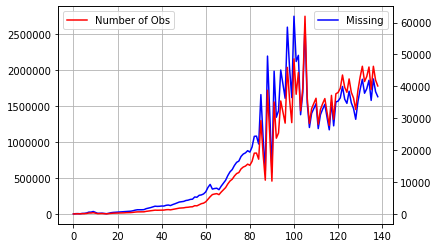

In [6]:
#member_id is completely empty, drop it
accpt_clean.drop('member_id', axis = 1)
#calculate number of missing and total number of observations by issue date
accpt_clean['rowNA'] = accpt_clean.isnull().sum(axis=1)
accpt_clean['obs'] = 1
date_x_na = accpt_clean.groupby('issue_d')[['rowNA', 'obs']].sum().reset_index()
accpt_clean.drop(['rowNA', 'obs'], axis = 1, inplace = True)

#plot
plt.figure()
ax1 = date_x_na.rowNA.plot(color='blue', grid=True, label='Missing')
ax2 = date_x_na.obs.plot(color='red', grid=True, secondary_y=True, label='Number of Obs')
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.show()

# DTI

DTI is heavily skewed and contains many values that are atypical of normal DTIs. It is possible that some missing values were filled with very high values or different scales were used. Future analysis should remove outliers or fix data steps that were taken by Lending Club.

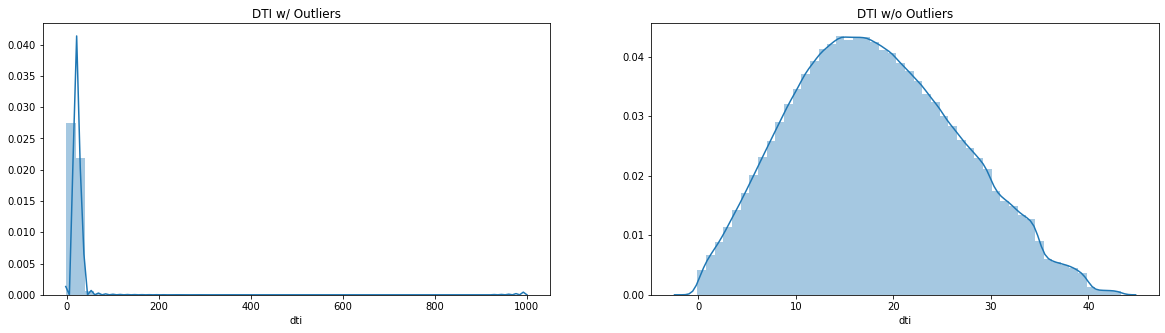

In [7]:
def outlier_filter(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    IQR = q3 - q1
    lower_bound = (q1 - 1.5 * IQR)
    upper_bound = (q3 + 1.5 * IQR)
    outlier_bool = (x >= lower_bound) & (x <= upper_bound)
    return outlier_bool

fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(accpt_clean['dti'].dropna(), ax = ax[0])
sns.distplot(accpt_clean['dti'][outlier_filter(accpt_clean['dti'])], ax = ax[1])
ax[0].set_title('DTI w/ Outliers')
ax[1].set_title('DTI w/o Outliers')
plt.show()

# Save Cleaned Data

In [8]:
accpt_clean.to_csv(clean_data_fpath / ('{}cleaned.csv'.format(filename)), index = True)